## Chicago Crime Data 

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is '/Users/ashleyheinrich/Downloads/'



In [3]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = "/Users/ashleyheinrich/Downloads/Crimes_-_2001_to_Present.csv" #(or slice correct index from the crime_files list)

if RAW_FILE == "YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable to match your local filepath.")
	
RAW_FILE

'/Users/ashleyheinrich/Downloads/Crimes_-_2001_to_Present.csv'

In [4]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [6]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.00,12.00,61.00,08B,"1,165,074.00","1,875,917.00",2015,02/10/2018 03:50:01 PM,41.82,-87.67,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.00,29.00,25.00,06,"1,138,875.00","1,904,869.00",2015,02/10/2018 03:50:01 PM,41.90,-87.77,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.00,35.00,21.00,18,"1,152,037.00","1,920,384.00",2015,02/10/2018 03:50:01 PM,41.94,-87.72,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.00,28.00,25.00,08A,"1,141,706.00","1,900,086.00",2015,02/10/2018 03:50:01 PM,41.88,-87.76,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812453,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.00,44.00,6.00,26,"1,172,497.00","1,919,410.00",2022,01/03/2023 03:46:28 PM,41.93,-87.64,"(41.934304581, -87.641484982)"
7812454,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.00,9.00,49.00,11,"1,179,966.00","1,828,818.00",2022,01/03/2023 03:46:28 PM,41.69,-87.62,"(41.685543881, -87.616812541)"
7812455,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.00,5.00,43.00,06,"1,193,181.00","1,859,005.00",2022,01/03/2023 03:46:28 PM,41.77,-87.57,"(41.768068052, -87.567452932)"
7812456,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.00,45.00,11.00,18,"1,140,553.00","1,933,418.00",2022,01/03/2023 03:46:28 PM,41.97,-87.76,"(41.973391184, -87.758534512)"


In [7]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [8]:
# this cell can take up to 1 min to run
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1310288,G000636,01/01/2001 01:00:00 AM,075XX S UNION AV,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.00,NaN,NaN,14,"1,172,985.00","1,854,673.00",2001,08/17/2015 03:03:40 PM,41.76,-87.64,"(41.756650158, -87.641607815)"
2001-01-01 01:00:00,1311626,G001009,01/01/2001 01:00:00 AM,023XX S TROY ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.00,NaN,NaN,14,"1,155,692.00","1,888,116.00",2001,08/17/2015 03:03:40 PM,41.85,-87.70,"(41.848786421, -87.704086603)"
2001-01-01 01:00:00,1310824,G001340,01/01/2001 01:00:00 AM,071XX S MICHIGAN AV,0820,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.00,NaN,NaN,06,"1,178,353.00","1,857,936.00",2001,08/17/2015 03:03:40 PM,41.77,-87.62,"(41.765484067, -87.621836295)"
2001-01-01 01:00:00,6154338,HP242745,01/01/2001 01:00:00 PM,065XX S KEDZIE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,66.00,06,"1,156,214.00","1,861,165.00",2001,04/02/2008 01:05:33 AM,41.77,-87.70,"(41.774818809, -87.702896431)"
2001-01-01 01:00:00,3206463,HK204378,01/01/2001 01:00:00 AM,027XX W 87TH ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.00,18.00,70.00,02,"1,159,813.00","1,846,866.00",2001,03/31/2006 10:03:38 PM,41.74,-87.69,"(41.735507018, -87.690094853)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 12:48:00,13091787,JG281798,05/30/2023 12:48:00 PM,031XX W IRVING PARK RD,0860,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.00,33.00,16.00,06,"1,154,535.00","1,926,422.00",2023,06/06/2023 04:48:06 PM,41.95,-87.71,"(41.953924785, -87.707307)"
2023-05-30 12:50:00,13090302,JG280834,05/30/2023 12:50:00 PM,119XX S LAFAYETTE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.00,9.00,53.00,14,"1,178,063.00","1,825,775.00",2023,06/06/2023 04:48:06 PM,41.68,-87.62,"(41.677236654, -87.623870682)"
2023-05-30 12:52:00,13089754,JG280254,05/30/2023 12:52:00 AM,067XX W BELMONT AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.00,36.00,18.00,14,"1,131,110.00","1,920,530.00",2023,06/06/2023 04:48:06 PM,41.94,-87.79,"(41.938193738, -87.793557786)"


In [9]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

## Separate the Full Dataset by Years

In [10]:
# save the years for every crime
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486804
2001    485882
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336265
2013    307471
2014    275738
2016    269799
2017    269082
2018    268790
2015    264764
2019    261269
2022    238530
2020    212132
2021    208633
2023    100410
Name: Year, dtype: int64

In [11]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [12]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.00,NaN,2001,41.76,-87.64
2001-01-01 01:00:00,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.00,NaN,2001,41.85,-87.70
2001-01-01 01:00:00,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.00,NaN,2001,41.77,-87.62
2001-01-01 01:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,2001,41.77,-87.70
2001-01-01 01:00:00,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.00,18.00,2001,41.74,-87.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 12:48:00,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.00,33.00,2023,41.95,-87.71
2023-05-30 12:50:00,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.00,9.00,2023,41.68,-87.62
2023-05-30 12:52:00,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.00,36.00,2023,41.94,-87.79


In [13]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7812458 entries, 2001-01-01 01:00:00 to 2023-05-30 12:59:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 730.2+ MB


In [14]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   62,499,664.00
ID                      62,499,664.00
Date                   617,184,182.00
Primary Type           523,742,970.00
Description            571,837,953.00
Location Description   532,510,480.00
Arrest                   7,812,458.00
Domestic                 7,812,458.00
Beat                    62,499,664.00
District                62,499,664.00
Ward                    62,499,664.00
Year                   476,559,938.00
Latitude                62,499,664.00
Longitude               62,499,664.00
dtype: float64

In [15]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [16]:
FINAL_DROP = ['Datetime','Year']#,'Location Description']

In [17]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2001.csv
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2002.csv
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2003.csv
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2004.csv
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2005.csv
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2006.csv
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2007.csv
- Succesfully saved /Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Proj

In [18]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2001.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2002.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2003.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2004.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2005.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2006.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2007.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2008.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2009.csv',
 '/Users/ashleyheinrich/Documents/DataEnrichment/Chicago_Crime_Project/Data/Chicago-Crime_2

In [19]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Testing if files were created successfully.

In [20]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holidays,State Holidays
0,"1,310,288.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,41.76,-87.64,NaN,NaN
1,"1,311,626.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"1,033.00",10.00,NaN,41.85,-87.70,NaN,NaN
2,"1,310,824.00",01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323.00,3.00,NaN,41.77,-87.62,NaN,NaN
3,"6,154,338.00",01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831.00,8.00,15.00,41.77,-87.70,NaN,NaN
4,"3,206,463.00",01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835.00,8.00,18.00,41.74,-87.69,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7942,NaN,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7943,NaN,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7944,NaN,2022-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7945,NaN,2022-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001          485882
2001-01-01         1
2001-01-02         1
2001-01-03         1
2001-01-04         1
               ...  
2022-10-01         1
2022-10-02         1
2022-10-03         1
2022-10-04         1
2023          100410
Name: Date, Length: 7970, dtype: int64

## Questions

**1) Comparing Police Districts:
Which district has the most crimes? Which has the least?**

In [22]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7820405 entries, 0 to 7946
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    float64
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                object 
 6   Domestic              object 
 7   Beat                  float64
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
 12  US Holidays           object 
 13  State Holidays        object 
dtypes: float64(6), object(8)
memory usage: 895.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holidays,State Holidays
0,"1,310,288.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,41.76,-87.64,NaN,NaN
1,"1,311,626.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"1,033.00",10.00,NaN,41.85,-87.70,NaN,NaN
2,"1,310,824.00",01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323.00,3.00,NaN,41.77,-87.62,NaN,NaN
3,"6,154,338.00",01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831.00,8.00,15.00,41.77,-87.70,NaN,NaN
4,"3,206,463.00",01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835.00,8.00,18.00,41.74,-87.69,NaN,NaN


In [23]:
df.isna().sum()

ID                         7947
Date                          0
Primary Type               7947
Description                7947
Location Description      18506
Arrest                     7947
Domestic                   7947
Beat                       7947
District                   7994
Ward                     622795
Latitude                  95444
Longitude                 95444
US Holidays             7820161
State Holidays          7820104
dtype: int64

In [24]:
# Working with district data/primary type first so filling missing values. 
df.dropna(subset = ['District'], inplace=True)

In [25]:
df.isna().sum()

ID                            0
Date                          0
Primary Type                  0
Description                   0
Location Description      10559
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                     614848
Latitude                  87497
Longitude                 87497
US Holidays             7812411
State Holidays          7812411
dtype: int64

In [26]:
district_count = df.groupby('District')['Primary Type'].count()
district_count

District
1.00     316057
2.00     369886
3.00     396210
4.00     443514
5.00     346173
6.00     456881
7.00     451604
8.00     524945
9.00     381633
10.00    336583
11.00    501255
12.00    387286
14.00    302237
15.00    334708
16.00    261552
17.00    225505
18.00    350645
19.00    350749
20.00    138186
21.00         4
22.00    256059
24.00    236030
25.00    444467
31.00       242
Name: Primary Type, dtype: int64

In [27]:
# District 8 had the most crimes
max_crime = district_count.idxmax()
max_crime

8.0

In [28]:
# District 5.5 had the least crimes
min_crime = district_count.idxmin()
min_crime

21.0

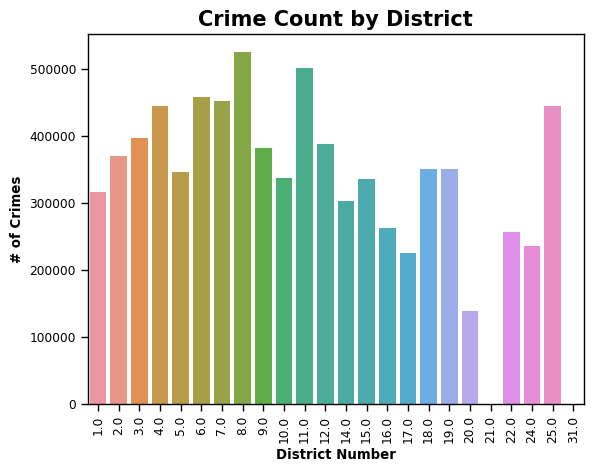

In [29]:
# Visualization
sns.set_context("paper")
chart = sns.countplot(x = df['District'])

chart.set_title('Crime Count by District', fontdict = {'size':15, 'weight':'bold'});
chart.set_xlabel('District Number', fontdict ={'weight': 'bold'});
chart.set_ylabel('# of Crimes', fontdict = {'weight':'bold'});
#ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 90);
plt.show()

**2) Crimes Across the Years:
Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**

In [30]:
date_format = "%m/%d/%Y %H:%M:%S %p"

In [31]:
df['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
df = df.sort_values('Datetime')
df = df.set_index('Datetime')
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holidays,State Holidays
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,"1,310,288.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,41.76,-87.64,NaN,NaN
2001-01-01 01:00:00,"1,410,662.00",01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223.00,2.00,NaN,41.80,-87.61,NaN,NaN
2001-01-01 01:00:00,"1,311,226.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"1,913.00",19.00,NaN,41.95,-87.68,NaN,NaN
2001-01-01 01:00:00,"1,326,041.00",01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,"1,624.00",16.00,NaN,41.96,-87.75,NaN,NaN
2001-01-01 01:00:00,"1,314,713.00",01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,"1,322.00",12.00,NaN,41.90,-87.67,NaN,NaN


In [32]:
df2 = df
df2.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holidays,State Holidays
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,"1,310,288.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,41.76,-87.64,NaN,NaN
2001-01-01 01:00:00,"1,410,662.00",01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223.00,2.00,NaN,41.80,-87.61,NaN,NaN
2001-01-01 01:00:00,"1,311,226.00",01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"1,913.00",19.00,NaN,41.95,-87.68,NaN,NaN
2001-01-01 01:00:00,"1,326,041.00",01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,"1,624.00",16.00,NaN,41.96,-87.75,NaN,NaN
2001-01-01 01:00:00,"1,314,713.00",01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,"1,322.00",12.00,NaN,41.90,-87.67,NaN,NaN


In [33]:
# Pulling out just the date from datetime
df2['Date'] = df.index.date
df2.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holidays,State Holidays
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,"1,310,288.00",2001-01-01,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,41.76,-87.64,NaN,NaN
2001-01-01 01:00:00,"1,410,662.00",2001-01-01,ASSAULT,SIMPLE,RESIDENCE,False,True,223.00,2.00,NaN,41.80,-87.61,NaN,NaN
2001-01-01 01:00:00,"1,311,226.00",2001-01-01,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"1,913.00",19.00,NaN,41.95,-87.68,NaN,NaN
2001-01-01 01:00:00,"1,326,041.00",2001-01-01,BATTERY,SIMPLE,RESIDENCE,False,False,"1,624.00",16.00,NaN,41.96,-87.75,NaN,NaN
2001-01-01 01:00:00,"1,314,713.00",2001-01-01,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,"1,322.00",12.00,NaN,41.90,-87.67,NaN,NaN


In [34]:
# Pulling out the year from datetime
df2['Year'] = df2.index.year
df2.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holidays,State Holidays,Year
Datetime,,,,,,,,,,,,,,,
2001-01-01 01:00:00,"1,310,288.00",2001-01-01,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,41.76,-87.64,NaN,NaN,2001
2001-01-01 01:00:00,"1,410,662.00",2001-01-01,ASSAULT,SIMPLE,RESIDENCE,False,True,223.00,2.00,NaN,41.80,-87.61,NaN,NaN,2001
2001-01-01 01:00:00,"1,311,226.00",2001-01-01,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"1,913.00",19.00,NaN,41.95,-87.68,NaN,NaN,2001
2001-01-01 01:00:00,"1,326,041.00",2001-01-01,BATTERY,SIMPLE,RESIDENCE,False,False,"1,624.00",16.00,NaN,41.96,-87.75,NaN,NaN,2001
2001-01-01 01:00:00,"1,314,713.00",2001-01-01,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,"1,322.00",12.00,NaN,41.90,-87.67,NaN,NaN,2001


In [35]:
df2['Year'].value_counts()

2002    486804
2001    485882
2003    475981
2004    469419
2005    453770
2006    448174
2007    437082
2008    427127
2009    392823
2010    370499
2011    351968
2012    336265
2013    307471
2014    275738
2016    269799
2017    269081
2018    268790
2015    264764
2019    261269
2022    238530
2020    212132
2021    208633
2023    100410
Name: Year, dtype: int64

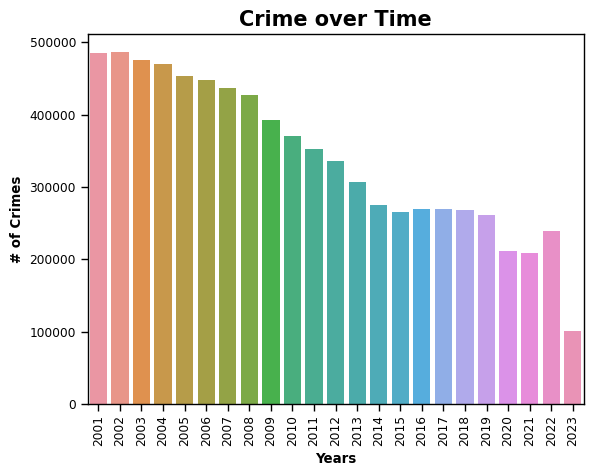

In [36]:
# Visualizing crimes over time
chart = sns.countplot(data = df2, x = 'Year');
chart.set_title('Crime over Time', fontdict = {'size':15, 'weight':'bold'});
chart.set_xlabel('Years', fontdict ={'weight': 'bold'});
chart.set_ylabel('# of Crimes', fontdict = {'weight':'bold'});
plt.xticks(rotation = 90);

* Crimes overall decrease over time with a slight increase in 2022 from 2021. 

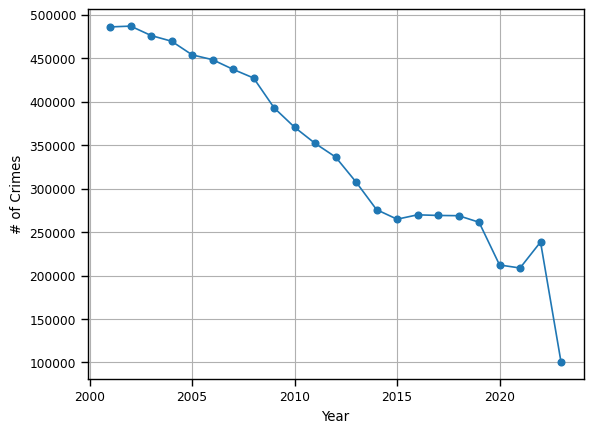

In [37]:
## save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [38]:
# Finding number of each crime per year
crimes_by_yr = df2.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_yr

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
                   2023    3487
Name: Year, Length: 720, dtype: int64

In [39]:
# Made a frame
plot_df = crimes_by_yr.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6339
716,WEAPONS VIOLATION,2020,8432
717,WEAPONS VIOLATION,2021,8980
718,WEAPONS VIOLATION,2022,8766


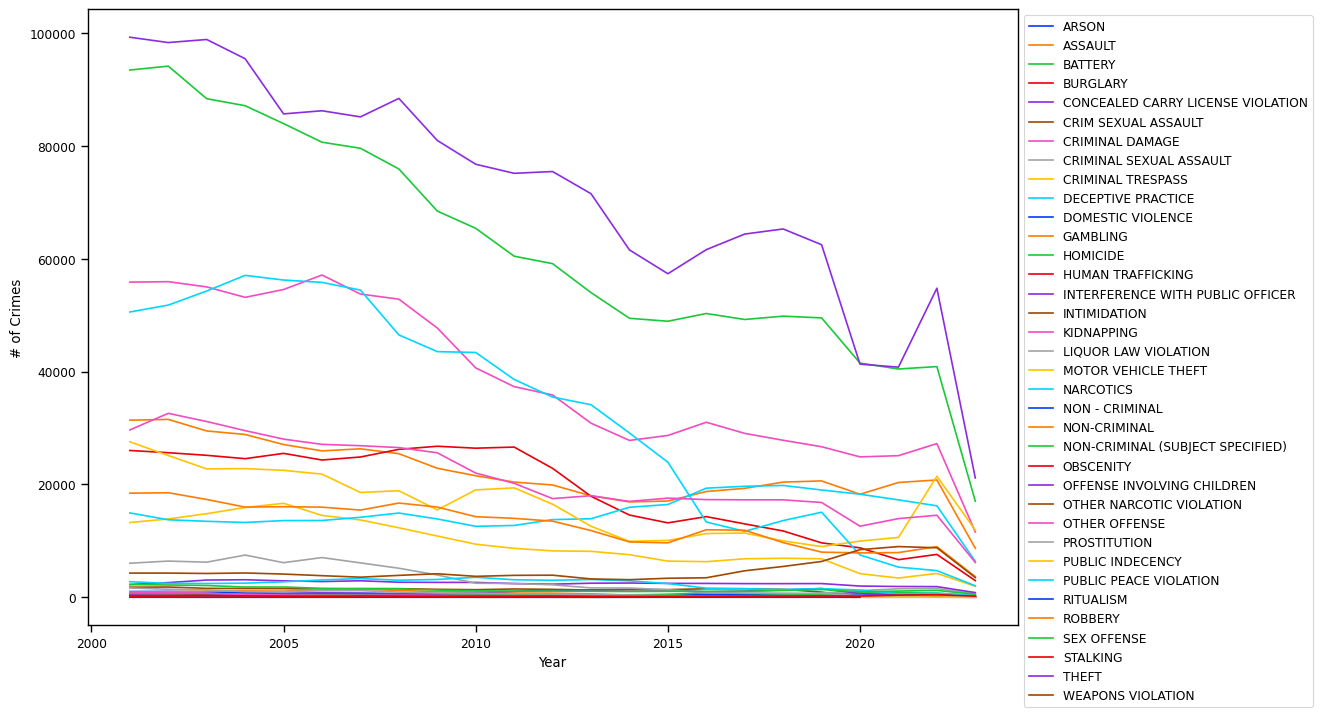

In [40]:
# Visualization with all the crimes

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=plot_df, x='Year',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,palette = 'bright')
ax.legend(bbox_to_anchor=[1,1]);

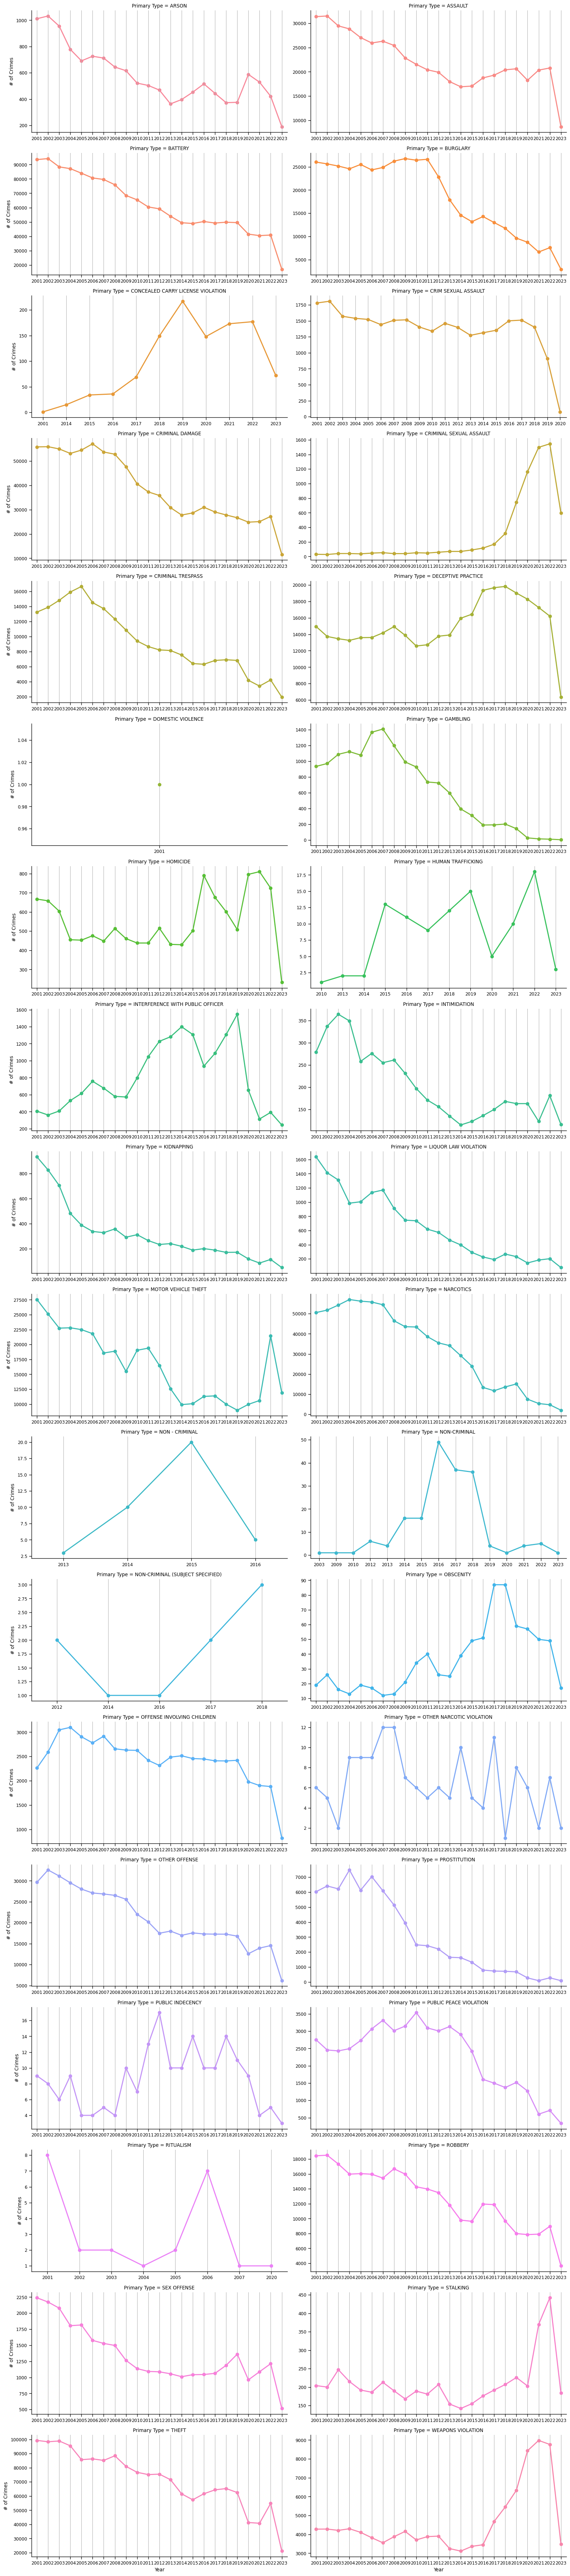

In [41]:
# Visualization 2: plot each crime separately over time
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

* Most crimes generally decreased overall with their own patterns but the following crimes had significant increases during these times: 
* Concealed carry license violation:from 2016-2019
* Criminal sexual assault from 2017-2022
* Deceptive practice from 2011 - 2018
* Non criminal from 2013- 2015. 
* Weapons violation from 2016-2022

**4) Comparing Months:
What months have the most crime? What months have the least?
Are there any individual crimes that do not follow this pattern? If so, which crimes?**

In [42]:
df2['Month'] = df2.index.month
df2['MonthName'] = df2.index.month_name()
df2.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holidays,State Holidays,Year,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,"1,310,288.00",2001-01-01,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621.00,6.00,NaN,41.76,-87.64,NaN,NaN,2001,1,January
2001-01-01 01:00:00,"1,410,662.00",2001-01-01,ASSAULT,SIMPLE,RESIDENCE,False,True,223.00,2.00,NaN,41.80,-87.61,NaN,NaN,2001,1,January
2001-01-01 01:00:00,"1,311,226.00",2001-01-01,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,"1,913.00",19.00,NaN,41.95,-87.68,NaN,NaN,2001,1,January
2001-01-01 01:00:00,"1,326,041.00",2001-01-01,BATTERY,SIMPLE,RESIDENCE,False,False,"1,624.00",16.00,NaN,41.96,-87.75,NaN,NaN,2001,1,January
2001-01-01 01:00:00,"1,314,713.00",2001-01-01,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,"1,322.00",12.00,NaN,41.90,-87.67,NaN,NaN,2001,1,January


In [43]:
# saving lookup for number vs name
unique_months = df2.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

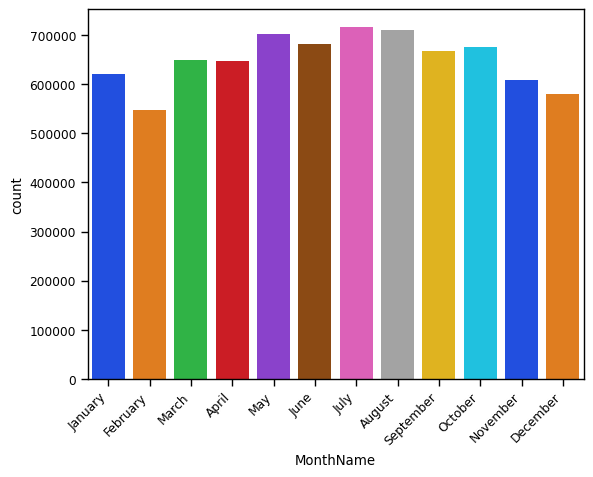

In [44]:
ax = sns.countplot(data=df2, x='MonthName',palette='bright',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

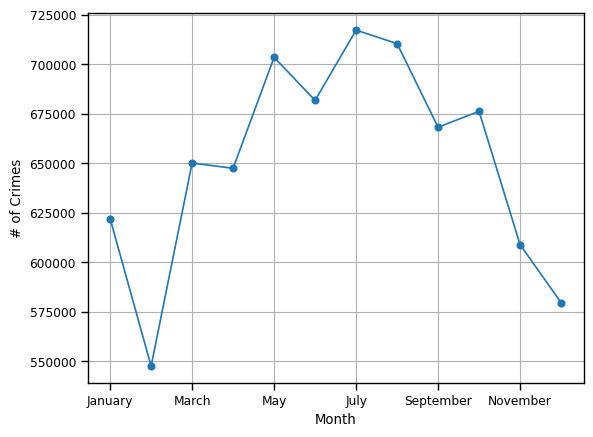

In [45]:
## save month counts
month_counts = df2['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

* You can see that the highest crimes happen in July and the lowest crimes happen in February. 
* Highest crime times tend to be summer months with lowest crime in the late fall/winter months. 

In [46]:
crimes_by_month = df2.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month

Primary Type       Month
ARSON              1         963
                   2         840
                   3        1140
                   4        1134
                   5        1277
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9188
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [47]:
plot_df2 = crimes_by_month.to_frame('Num of Crimes').reset_index()
plot_df2

,Primary Type,Month,Num of Crimes
0,ARSON,1,963
1,ARSON,2,840
2,ARSON,3,1140
3,ARSON,4,1134
4,ARSON,5,1277
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9188
413,WEAPONS VIOLATION,11,7952


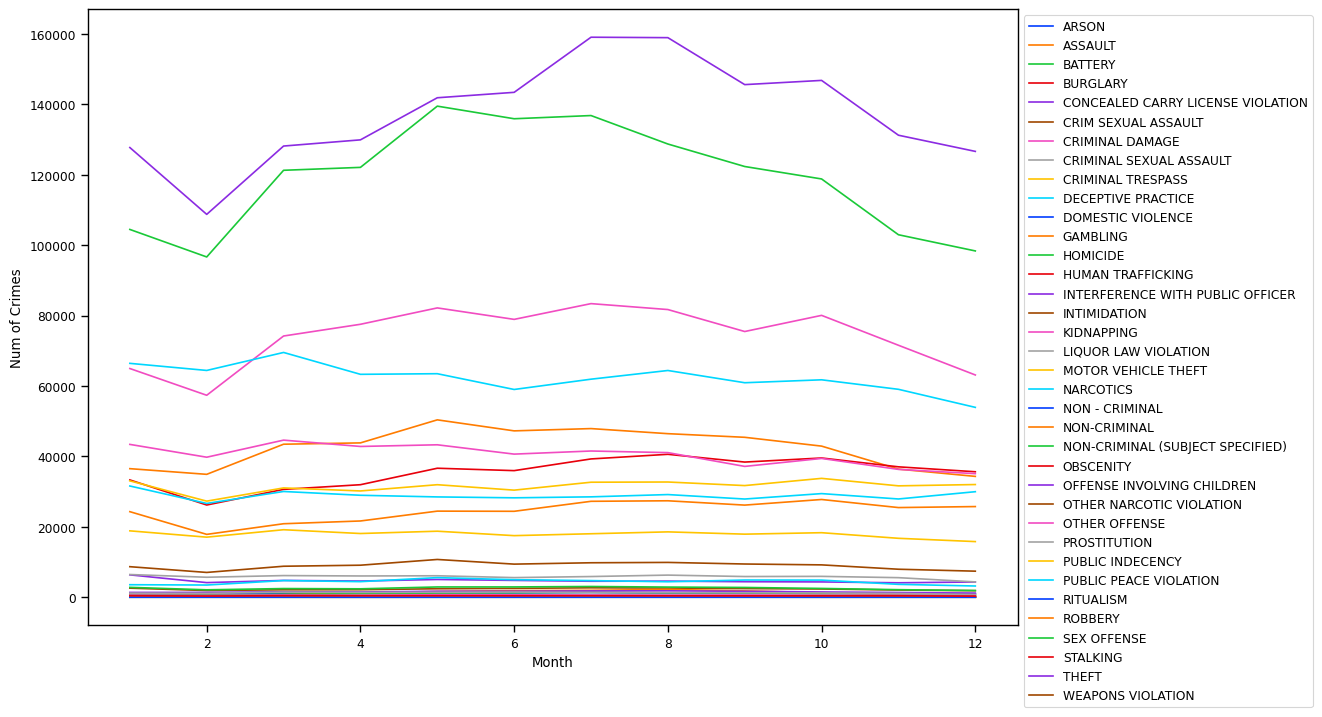

In [48]:
# Visualization with all the crimes

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=plot_df2, x='Month',y='Num of Crimes',markers=True,
                  hue='Primary Type',ax=ax,palette = 'bright')
ax.legend(bbox_to_anchor=[1,1]);

* Many crimes held steady across the year while some had that increase between months 6-9 or the summer months as seen previously. 

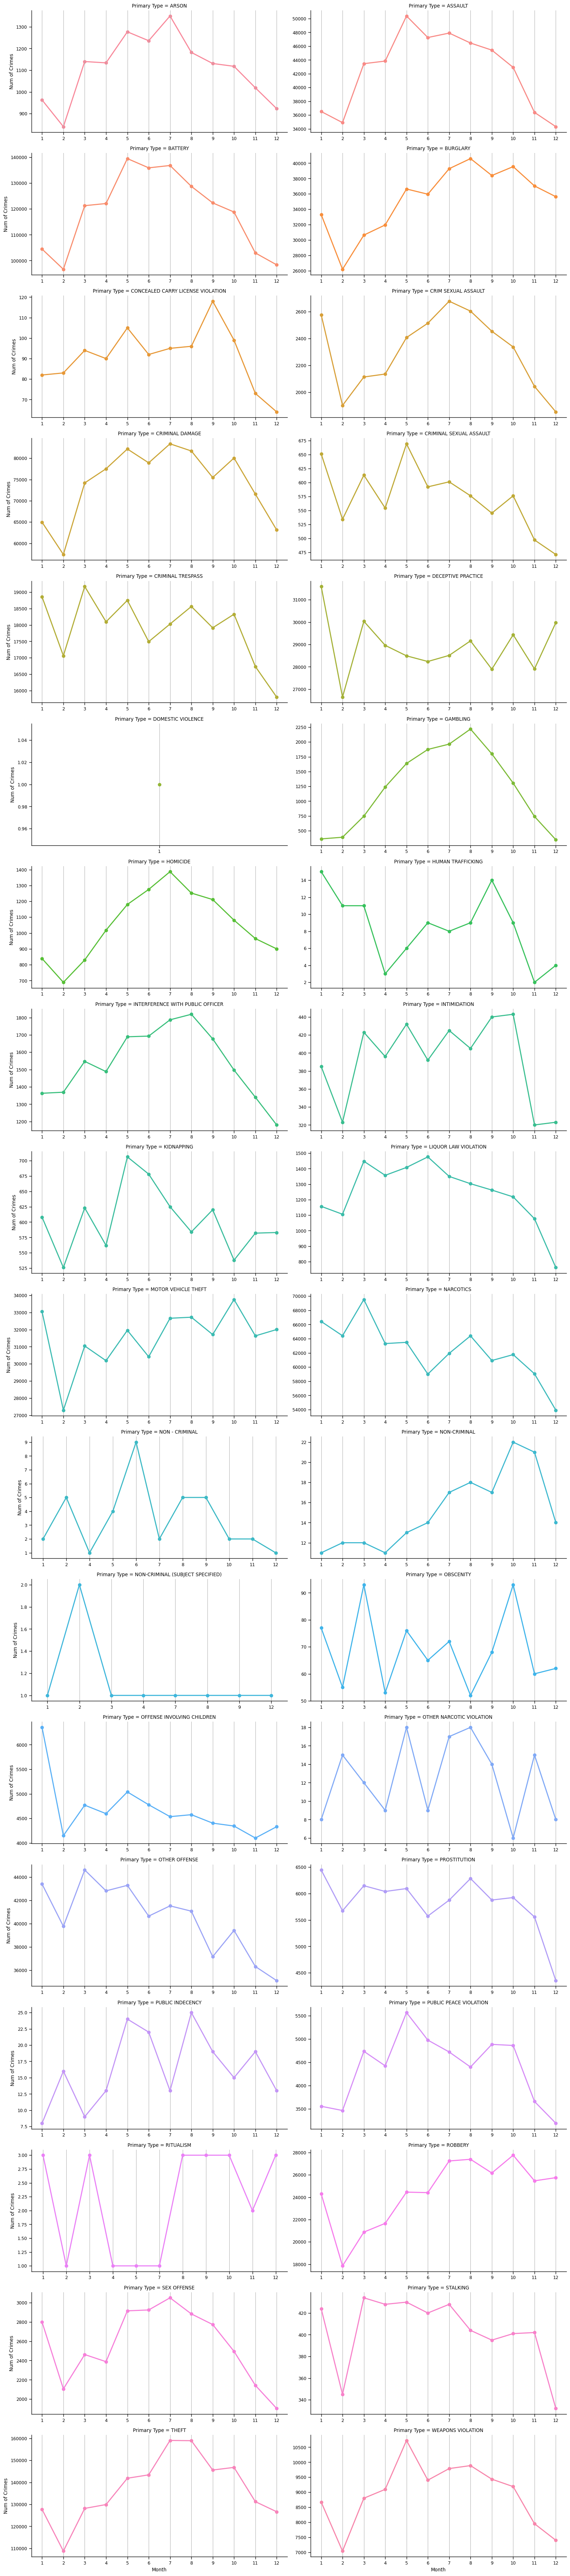

In [49]:
# Visualization 2: plot each crime separately over months/year
g2 = sns.catplot(data=plot_df2, x='Month', y='Num of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g2.axes];

* Crimes that didn't follow the seasonal pattern include:
* Crim sexual assault had very high numbers in January almost as high as July. 
* Kidnapping was highest in May then dropped low over the summer months. 
* Motor vehicle theft had highs in Jan and October. 
* Narcotics highest was March. 
* Non criminal highest was October
* Obscenity was highest in March and October
* Stalking was high in January like summer months that had the highest amount. 